In [1]:
%matplotlib inline
import pycbc.waveform
import numpy as np
import matplotlib.pyplot as plt
import h5py

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


Wishlist:
- Plot the (2,2) mode of the SXS simulation ('SXS:BBH:0002') in the raw units (masses)
- Write the waveform info into a pycbc TimeSeries object, and rescale the time step to total mass=20 (so each component mass is 10)
- Plot the rescaled waveform along with a SEOBNR_v2 waveform, in the time domain, with the same component mass paramters

In [2]:
rh_file = "SXS_BBH_2106/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5"
rh_data = h5py.File(rh_file,'r')

In [3]:
rh_data['Extrapolated_N4.dir/Y_l2_m2.dat'].shape

(18359, 3)

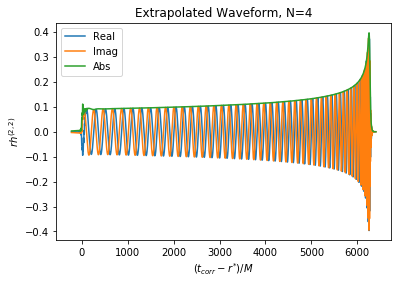

In [4]:
idx = 'Extrapolated_N4.dir/Y_l2_m2.dat'
ret_time = rh_data[idx][:,0]
rh = rh_data[idx][:,1] + 1j*rh_data[idx][:,2]

# To plot the waveform interactively, uncomment the following line:
# %matplotlib qt
plt.plot(ret_time, np.real(rh), label='Real')
plt.plot(ret_time, np.imag(rh), label='Imag')
plt.plot(ret_time,  np.abs(rh), label='Abs')
plt.title('Extrapolated Waveform, N=4')
plt.xlabel('$(t_{corr} - r^{*})/M$')
plt.ylabel('$rh^{(2,2)}$')
plt.legend()
plt.show()

In [5]:
rh_data.close()

In [6]:
from pycbc import types
import lal
scaler = lal.MTSUN_SI

In [26]:
total_mass = 30
factor = scaler*total_mass

In [27]:
sxs_reals = np.real(rh)

In [28]:
rescaled_ret_time = ret_time*factor

In [29]:
ret_time_len = len(rescaled_ret_time)
print (ret_time_len)

18359


In [30]:
delta_num = ret_time_len-1

In [31]:
deltas = []
for i in range(0, delta_num):
    deltas.append(rescaled_ret_time[i+1]-rescaled_ret_time[i])
#print (deltas)

In [32]:
smallest_time_interval = np.amin(deltas)

In [33]:
print (smallest_time_interval)

6.95380959847558e-06


In [34]:
new_time_interval = 1.0/4096

t0 = np.amin(rescaled_ret_time)
tf = np.amax(rescaled_ret_time)
t_range = tf-t0
print (t_range)
print (t_range/new_time_interval)

0.9802683994645224
4015.1793642066837


In [38]:
new_y_values = []
squared_rescaled_time = []
for i in range(0,4017):
    if (i <= 4015):
        ti = t0+i*(1.0/4096)
        diffs = abs(rescaled_ret_time - ti)
        matched_ind = np.argmin(diffs)
        y_value = sxs_reals[matched_ind]
        new_y_values.append(y_value)
        squared_rescaled_time.append(ti)
    else:
        ti = tf
        y_value = sxs_reals[len(sxs_reals)-1]
        new_y_values.append(y_value)
        squared_rescaled_time.append(ti)

new_y_values = np.asarray(new_y_values)
squared_rescaled_time = np.asarray(squared_rescaled_time)

In [39]:
print(len(new_y_values))

4017


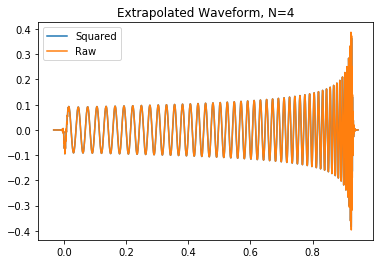

In [41]:
fig = plt.figure()
plt.plot(squared_rescaled_time, new_y_values, label='Squared')
plt.plot(rescaled_ret_time, np.real(rh), label='Raw')
plt.title('Extrapolated Waveform, N=4')
plt.legend()
plt.show()

In [47]:
sp = types.timeseries.TimeSeries(initial_array = new_y_values, delta_t = 1.0/4096)

In [48]:
print sp.delta_t

0.000244140625


In [49]:
hp, hc = pycbc.waveform.get_td_waveform(approximant = 'SEOBNRv2',
                        mass1 = 15.,
                        mass2 = 15., 
                        f_lower = 30.,
                        delta_t = sp.delta_t)

In [54]:
from pycbc.filter import match
import pycbc.psd 
from pycbc.psd import aLIGOZeroDetHighPower

tlen = max(len(hp), len(sp))
hp.resize(tlen)
sp.resize(tlen)
print ('Length of the waveforms: %s' % tlen)

my_psd = pycbc.psd.read.from_txt(filename = 'H1L1-O1_C02_HARM_MEAN_PSD-1126051217-11203200.txt',
                                   length = tlen,
                                    delta_f = hp.delta_f,
                                   low_freq_cutoff = 30.,
                                   is_asd_file = False)


#delta_f = 1.0 / sp.duration
#flen = tlen//2 + 1
#my_psd = aLIGOZeroDetHighPower(flen, delta_f, 30.)

m, i = match(hp, sp, psd=my_psd, low_frequency_cutoff=30.)
print ('match: %s' % m)


Length of the waveforms: 4144
match: 0.2956943555188342


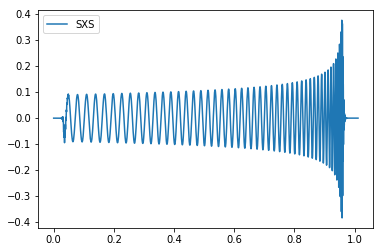

In [55]:
fig2 = plt.figure()
#plt.plot(hp.sample_times, hp, label ='SEOBNRv2')
plt.plot(sp.sample_times, sp, label = 'SXS')
plt.legend()
plt.show()

In [56]:
print (hp.duration)
print (sp.duration)

1.01171875
1.01171875


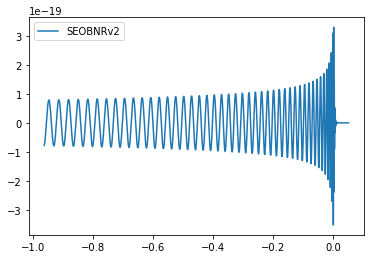

In [57]:
fig3 = plt.figure()
#plt.plot(hp.sample_times, hp, label ='SEOBNRv2')
plt.plot(hp.sample_times, hp, label = 'SEOBNRv2')
plt.legend()
plt.show()

In [99]:
k_file = "SXS_BBH_0002/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5"
k_data = h5py.File(k_file,'r')

In [100]:
k_data['Extrapolated_N4.dir/Y_l2_m2.dat'].shape

(31942, 3)

In [101]:
k_idx = 'Extrapolated_N4.dir/Y_l2_m2.dat'
k_ret_time = k_data[idx][:,0]
k_rh = k_data[idx][:,1] + 1j*k_data[idx][:,2]


In [102]:
k_reals = np.real(k_rh)
k_data.close()

In [103]:
new_factor = scaler*40
rescaled_k_time = k_ret_time*new_factor

In [104]:
k_time_len = len(rescaled_k_time)
print (k_time_len)

31942


In [105]:
k_delta_num = k_time_len-1

In [106]:
k_t0 = np.amin(rescaled_k_time)
k_tf = np.amax(rescaled_k_time)
k_t_range = k_tf-k_t0
print (k_t_range)
print (k_t_range/new_time_interval)

2.4284966896326656
9947.122440735398


In [107]:
k_new_y_values = []
k_squared_rescaled_time = []
for i in range(0,9949):
    if (i <= 9947):
        ti = k_t0+i*(1.0/4096)
        diffs = abs(rescaled_k_time - ti)
        matched_ind = np.argmin(diffs)
        y_value = k_reals[matched_ind]
        k_new_y_values.append(y_value)
        k_squared_rescaled_time.append(ti)
    else:
        ti = k_tf
        y_value = k_reals[len(k_reals)-1]
        k_new_y_values.append(y_value)
        k_squared_rescaled_time.append(ti)

k_new_y_values = np.asarray(k_new_y_values)
k_squared_rescaled_time = np.asarray(k_squared_rescaled_time)

In [108]:
print(len(k_new_y_values))

9949


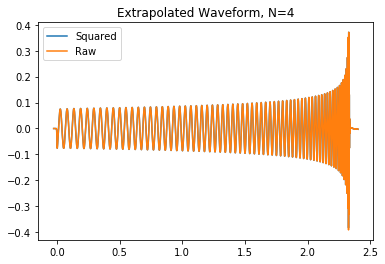

In [109]:
fig4 = plt.figure()
plt.plot(k_squared_rescaled_time, k_new_y_values, label='Squared')
plt.plot(rescaled_k_time, np.real(k_rh), label='Raw')
plt.title('Extrapolated Waveform, N=4')
plt.legend()
plt.show()

In [110]:
kp = types.timeseries.TimeSeries(initial_array = k_new_y_values, delta_t = 1.0/4096)

In [111]:
print (kp.delta_t)

0.000244140625


In [112]:
hp2, hc2 = pycbc.waveform.get_td_waveform(approximant = 'SEOBNRv2',
                        mass1 = 20.,
                        mass2 = 20., 
                        f_lower = 30.,
                        delta_t = sp.delta_t)


tlen = max(len(hp), len(kp))
hp2.resize(tlen)
kp.resize(tlen)
print ('Length of the waveforms: %s' % tlen)

my_psd = pycbc.psd.read.from_txt(filename = 'H1L1-O1_C02_HARM_MEAN_PSD-1126051217-11203200.txt',
                                   length = tlen,
                                    delta_f = hp2.delta_f,
                                   low_freq_cutoff = 30.,
                                   is_asd_file = False)


#delta_f = 1.0 / sp.duration
#flen = tlen//2 + 1
#my_psd = aLIGOZeroDetHighPower(flen, delta_f, 30.)

m, i = match(hp2, kp, psd=my_psd, low_frequency_cutoff=30.)
print ('match: %s' % m)

Length of the waveforms: 9949
match: 0.9872449497468546
